# Sales Prediction Code Alpha Internship Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set visualization style
sns.set(style="whitegrid")

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##  Data Preprocessing
**Cleaning  the data by removing unnecessary columns and checking for any missing values that might affect our model.**

In [3]:
# Dropping the 'Unnamed: 0' column as it is just an index
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Summary statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data analysis
**Visualize the relationships between advertising spend on different platforms (TV, Radio, Newspaper) and the resulting Sales.**

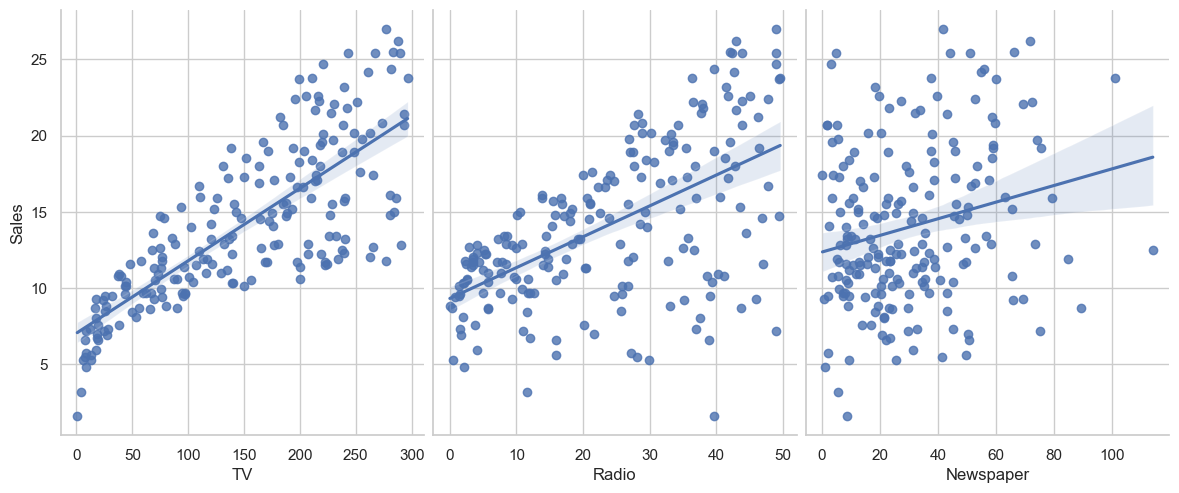

In [6]:
# Pairplot to visualize relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.show()

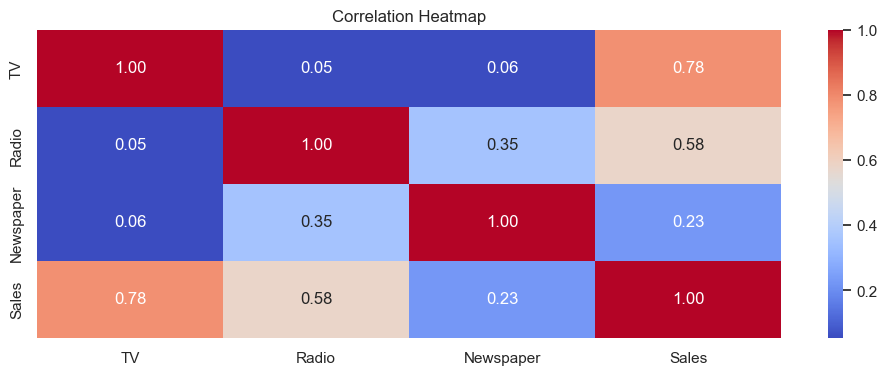

In [7]:
# Heatmap to check for correlation
plt.figure(figsize=(12, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Spliting Data
**Prepare the features ($X$) and the target variable ($y$), then split them into training and testing sets.**

In [8]:
# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (160, 3)
Testing set size: (40, 3)


## Model Building Linear Regression
**Apply a simple Linear Regression model to establish a baseline for prediction.**

In [9]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Display coefficients
coeffs = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print("Linear Regression Coefficients:")
display(coeffs)

Linear Regression Coefficients:


,Coefficient
TV,0.044730
Radio,0.189195
Newspaper,0.002761


## Model Building Random Forest
**Apply a more complex ensemble model (Random Forest) to capture non-linear relationships.**

In [10]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Feature Importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:")
display(importances)

Random Forest Feature Importance:


,Feature,Importance
0,TV,0.624810
1,Radio,0.362201
2,Newspaper,0.012989


## Model Evaluation 
**Compare the performance of both models using metrics like Mean Squared Error ($MSE$) and $R^2$**

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Performance ---")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Linear Regression Performance ---
Mean Squared Error: 3.1741
Mean Absolute Error: 1.4608
R2 Score: 0.8994

--- Random Forest Performance ---
Mean Squared Error: 0.5907
Mean Absolute Error: 0.6201
R2 Score: 0.9813



## Visulization Results
**Compare actual sales against the predicted sales from the best-performing model (Random Forest).**

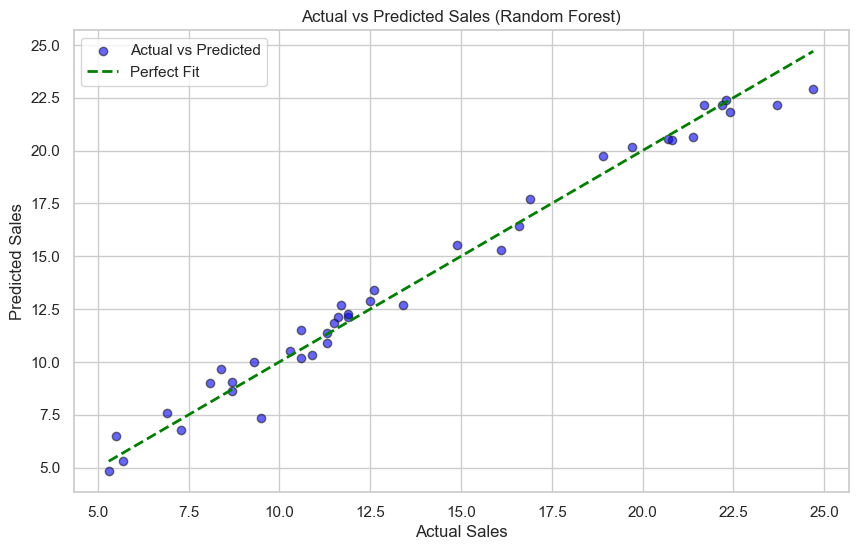

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.6, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2, linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.legend()
plt.show()

**Actionable Insights for Strategy:
1. TV advertising is the dominant driver of sales, contributing over 60% to the predictive power.
2. Radio provides a strong supporting role and should be used to augment TV campaigns.
3. Newspaper spend shows very little correlation with sales; consider reallocating this budget.
4. The Random Forest model's high R2 score indicates that sales outcomes are highly predictable based on budget allocation.**